In [1]:
#Libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
#Timeframe and Data Scraping
end_date = datetime.today()
start_date = end_date - timedelta(days = 365 * 2)
holding = ['CBA.AX']
for holding in holding:
    df = yf.download(holding, start=start_date, end=end_date)
df['Adj Close'] = df['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [3]:
#Lowest 
df['Adj Close'].min()

85.08475494384766

In [4]:
#Highest
df['Adj Close'].max()

131.66000366210938

In [5]:
#Average
df['Adj Close'].mean()

102.38499390132843

In [6]:
#Standard Deviation
df['Adj Close'].std()

10.560924960680529

In [7]:
#Daily returns
df['Daily_Returns'] = df['Adj Close'].shift(1)/ df['Adj Close'] -1 
df['Daily_Returns'].head().dropna()


Date
2022-07-18   -0.010293
2022-07-19   -0.007478
2022-07-20   -0.011143
2022-07-21   -0.016390
Name: Daily_Returns, dtype: float64

In [8]:
#Log Returns
df['Log_Returns'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))

Text(0, 0.5, 'Price')

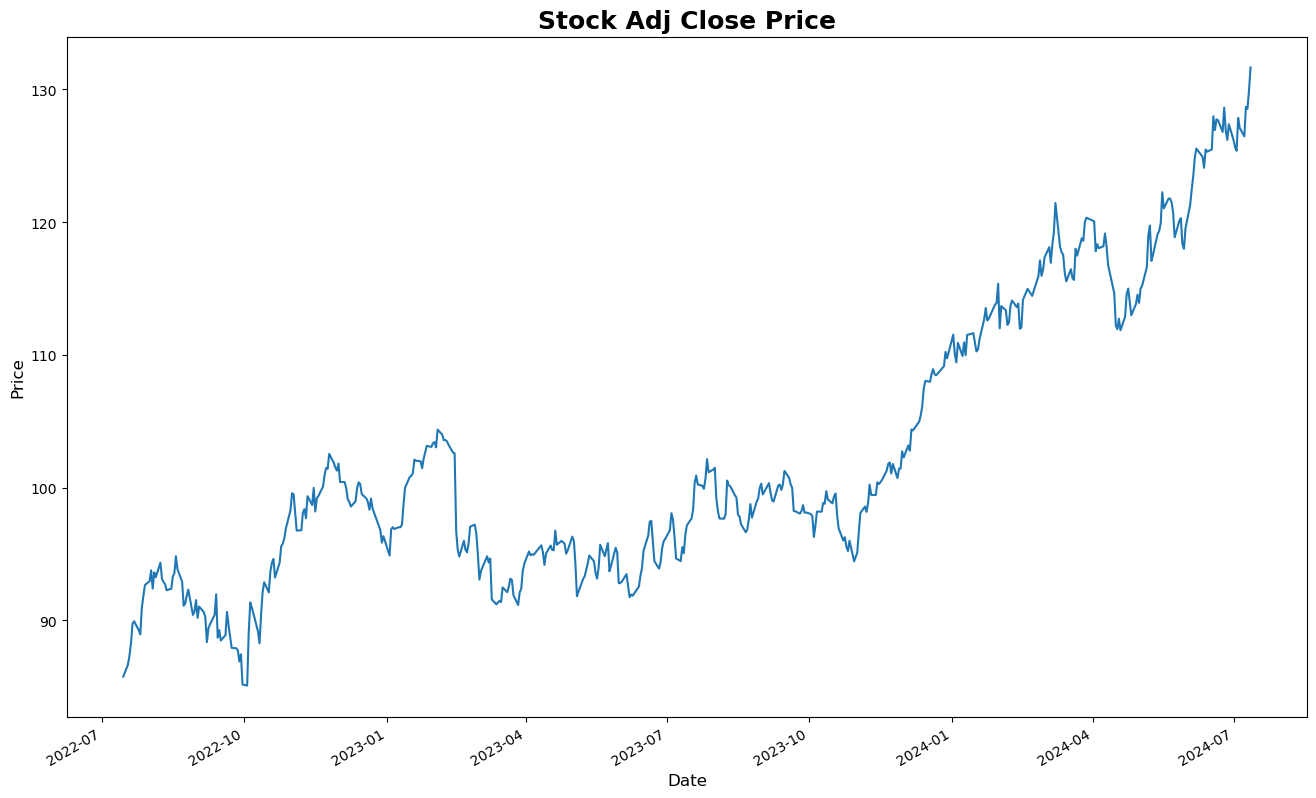

In [9]:
#PLot Simple Line Chart
#Plot Adj Close
plt.figure(figsize=(16,10))
df['Adj Close'].plot()
plt.title('Stock Adj Close Price', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

Text(0, 0.5, 'Price')

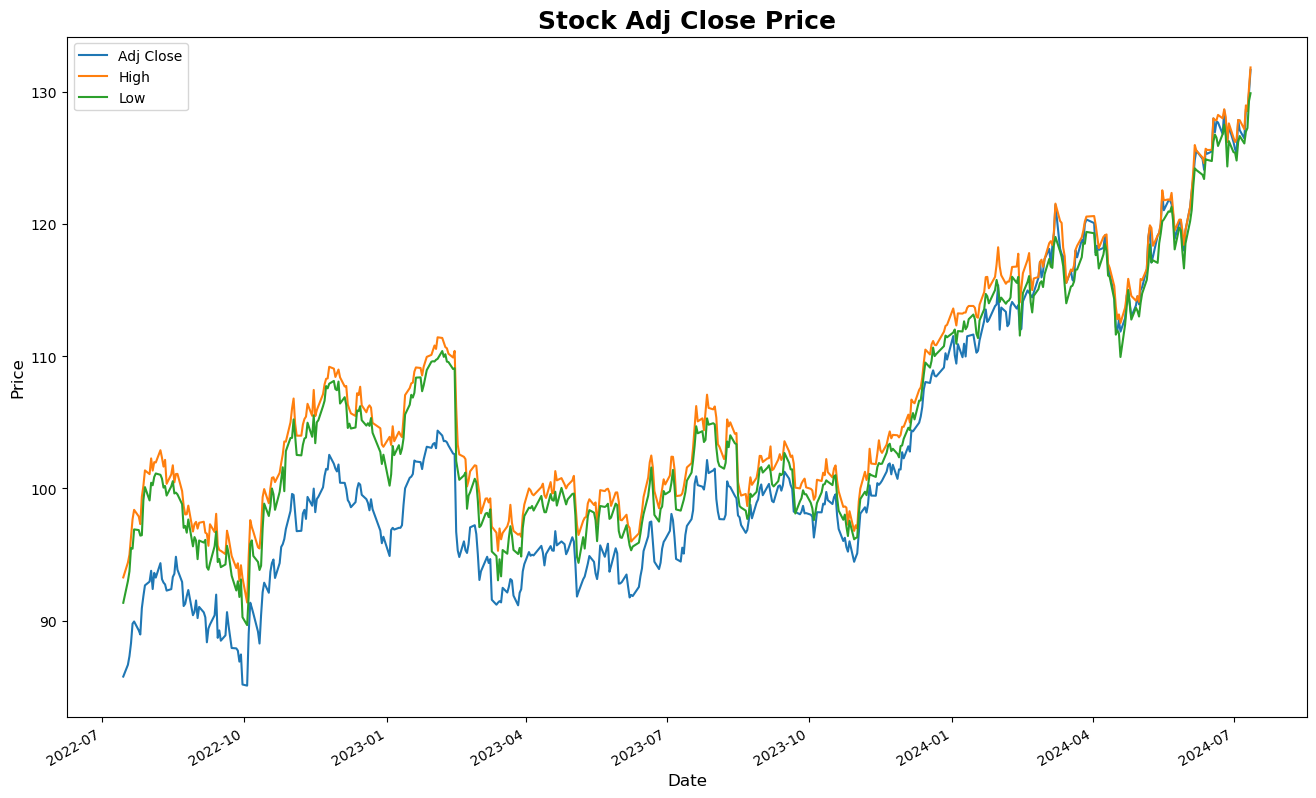

In [10]:
#Plot Adj Close
df[['Adj Close','High','Low']].plot(figsize=(16,10))
plt.title('Stock Adj Close Price', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

<function matplotlib.pyplot.show(close=None, block=None)>

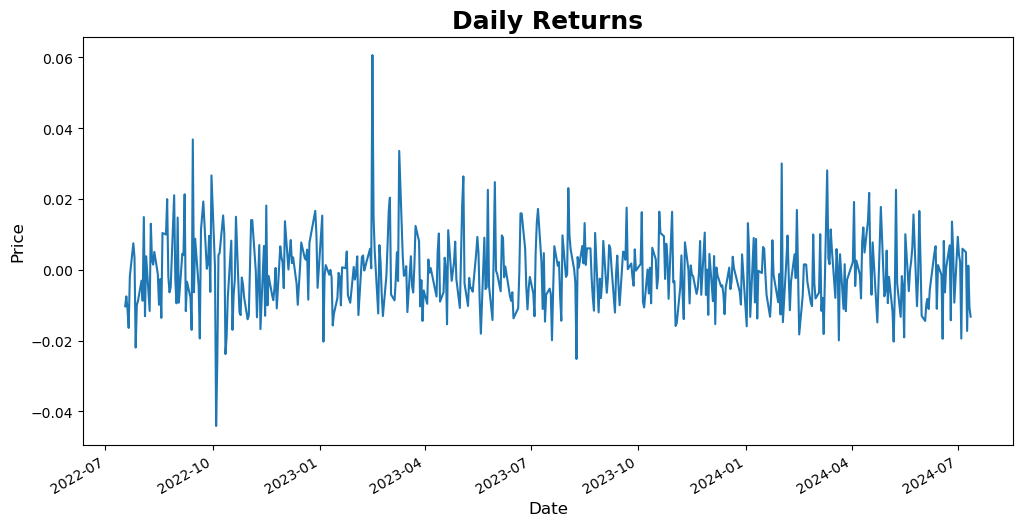

In [11]:
df['Daily_Returns'].plot(figsize=(12,6))
plt.title('Daily Returns', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

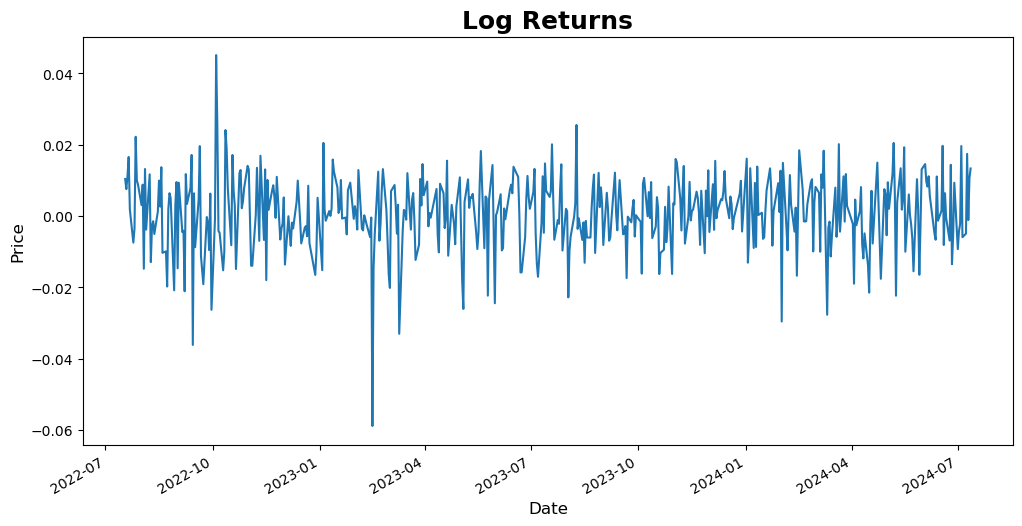

In [12]:
#Log Returns
df['Log_Returns'].plot(figsize=(12,6))
plt.title('Log Returns', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show


In [13]:
window = 252
Max_drawdown = df['Adj Close'].rolling(window, min_periods=1).max()
Daily_drawdown = df['Adj Close']/Max_drawdown - 1.0
Neg_drawdown = Daily_drawdown.rolling(window, min_periods=1).min()

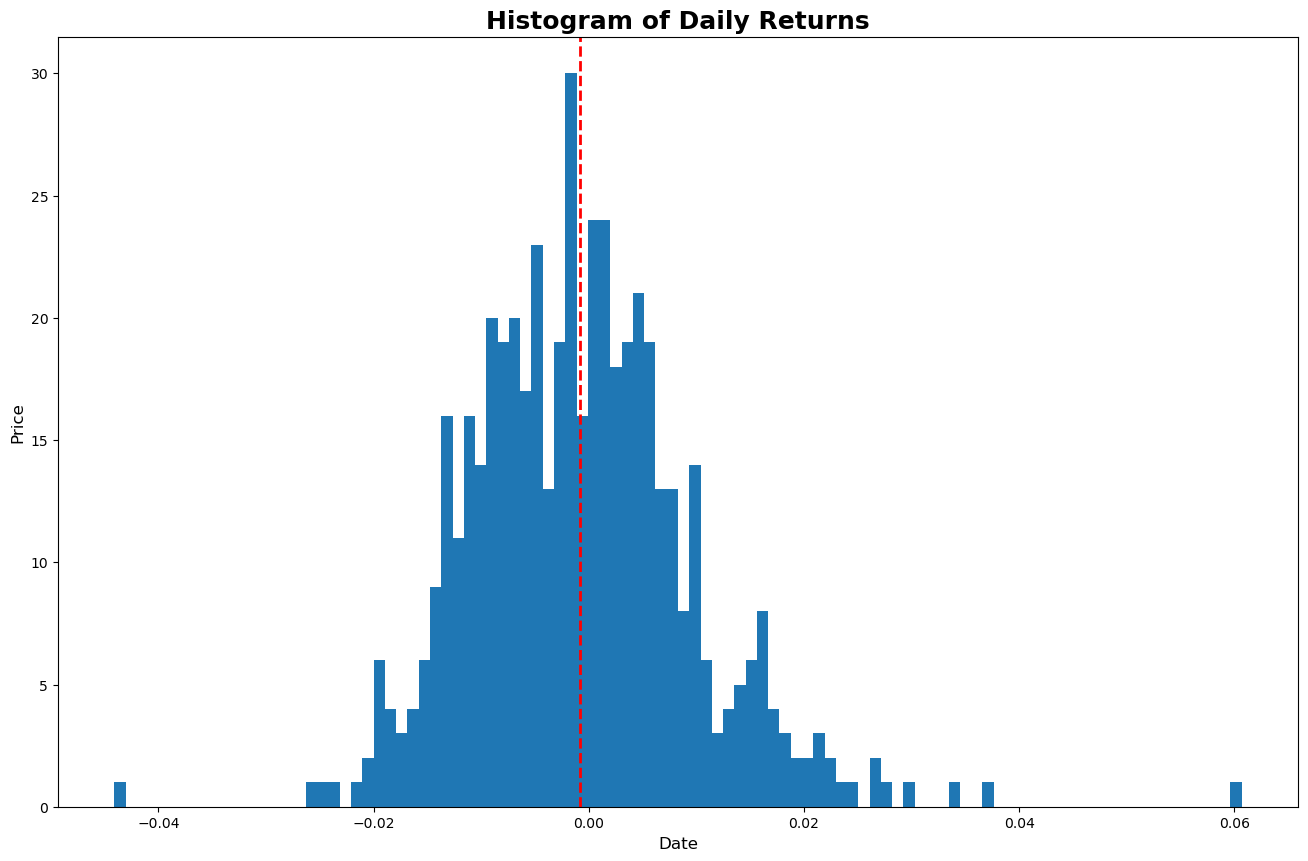

In [14]:
#Daily Returns
plt.figure(figsize=(16,10))
plt.hist(df['Daily_Returns'].dropna(), bins=100)
plt.title('Histogram of Daily Returns', fontsize=18, fontweight='bold')
plt.axvline(df['Daily_Returns'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show(
)

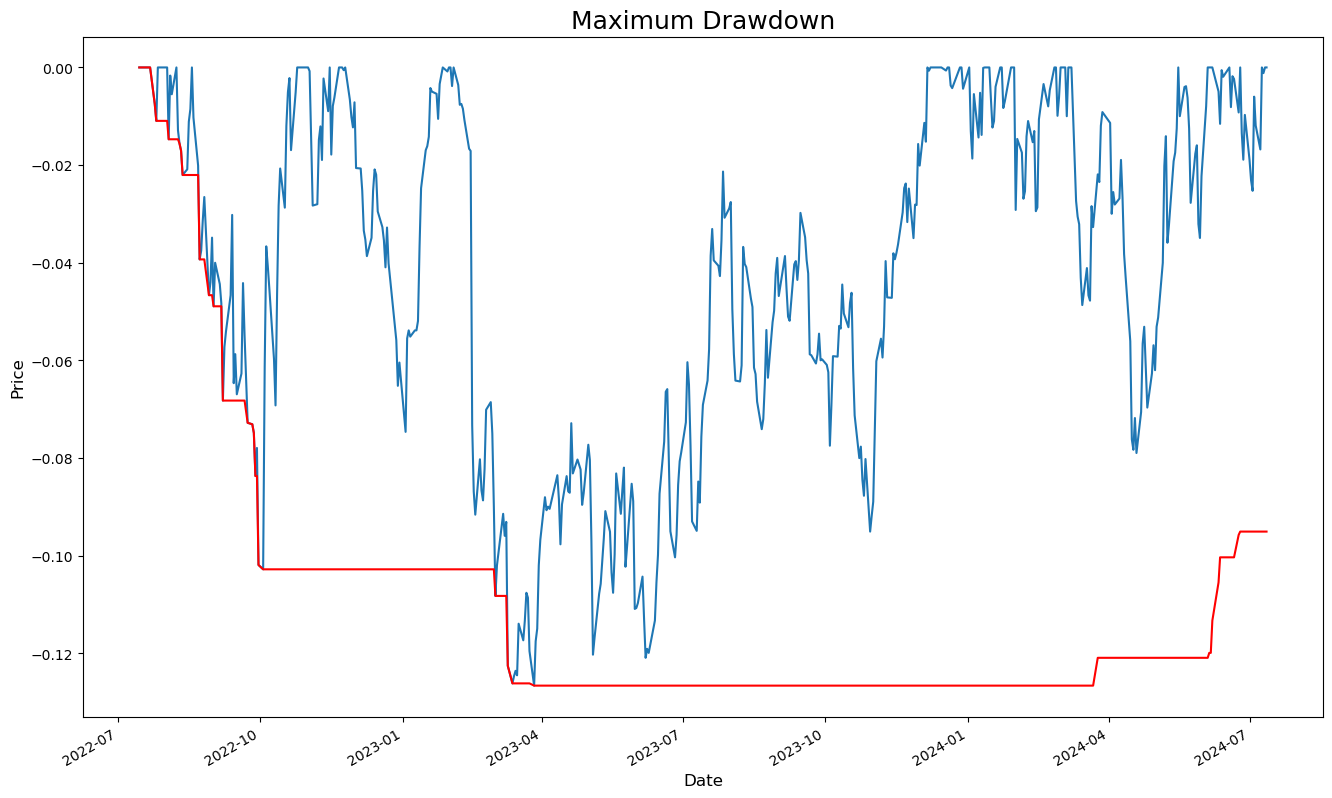

In [15]:
#Plot Downdraw
plt.figure(figsize=(16,10))
Daily_drawdown.plot()
Neg_drawdown.plot(color='r')
plt.title('Maximum Drawdown', fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()